In [3]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from scipy import stats

import cv2
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [4]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [5]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

c:\Users\user\.conda\envs\EXAM_MML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
X, y = mnist.data, mnist.target
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [8]:
X.shape, y.shape

((70000, 784), (70000,))

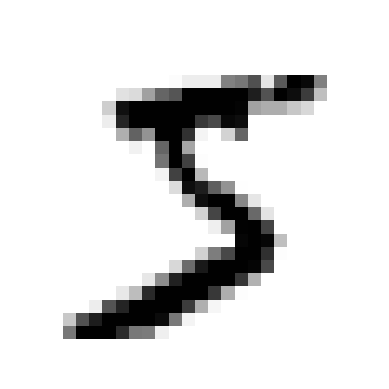

In [13]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

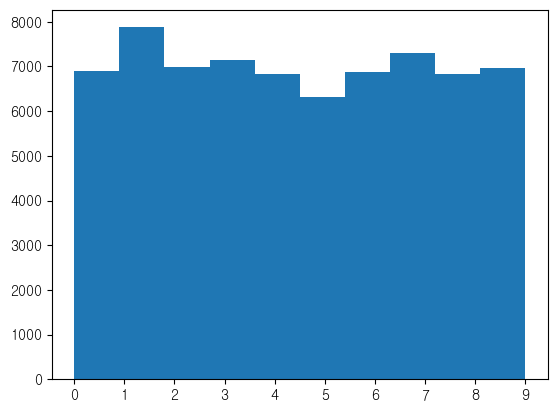

In [10]:
plt.hist(np.sort(y))
plt.show()

In [43]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

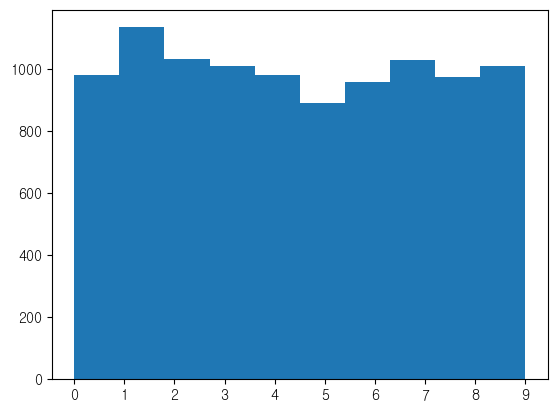

In [80]:
plt.hist(np.sort(y_test))
plt.show()

In [44]:
y_train_5 = (y_train == '5')  # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == '5') 

## SGDClassifier <hr>

#### fit 사용

In [45]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [46]:
sgd_clf.predict([some_digit])

array([ True])

In [47]:
print(f'훈련 스코어 => {sgd_clf.score(X_train, y_train_5)}\n\n 테스트 스코어 => {sgd_clf.score(X_test, y_test_5)}')

훈련 스코어 => 0.9522666666666667

 테스트 스코어 => 0.9492


In [48]:
y_pre_5 = sgd_clf.predict(X_test)

In [49]:
print(f'분류 정확도 => {accuracy_score(y_pre_5, y_test_5)}\n')
print(f'분류 정밀도 => {precision_score(y_pre_5, y_test_5)}\n')
print(f'분류 재현율 => {recall_score(y_pre_5, y_test_5)}\n')
print(f'분류 f1점수 => {f1_score(y_pre_5, y_test_5)}\n')

분류 정확도 => 0.9492

분류 정밀도 => 0.8800448430493274

분류 재현율 => 0.6618887015177066

분류 f1점수 => 0.75553416746872



In [50]:
print(classification_report(y_test_5, y_pre_5))

              precision    recall  f1-score   support

       False       0.99      0.96      0.97      9108
        True       0.66      0.88      0.76       892

    accuracy                           0.95     10000
   macro avg       0.82      0.92      0.86     10000
weighted avg       0.96      0.95      0.95     10000



In [57]:
img = cv2.imread('../DATA/img_five.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.invert(img_gray)
sgd_clf.predict(np.array(img_gray).reshape(1, -1))

array([False])

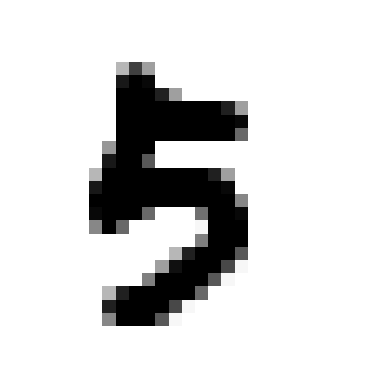

In [54]:
plot_digit(img_gray)
plt.show()

#### partial_fit 사용

In [59]:
sgd_clf = SGDClassifier(random_state = 42)
train_score_list1, test_score_list1 = [], []
for n in range(1, 101):
    sgd_clf.partial_fit(X_train[600*(n-1) : 600*n], y_train_5[600*(n-1) : 600*n], np.unique(y_train_5))
    train_score1 = sgd_clf.score(X_train[600*(n-1) : 600*n], y_train_5[600*(n-1) : 600*n])
    test_score1 = sgd_clf.score(X_test[100*(n-1) : 100*n], y_test_5[100*(n-1) : 100*n])
    print(f'[기본 SGD] 학습 점수 : {train_score1}, 테스트 점수 : {test_score1}\n')
    train_score_list1.append(train_score1)
    test_score_list1.append(test_score1)

[기본 SGD] 학습 점수 : 0.9483333333333334, 테스트 점수 : 0.89

[기본 SGD] 학습 점수 : 0.9533333333333334, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 0.9533333333333334, 테스트 점수 : 0.92

[기본 SGD] 학습 점수 : 0.9833333333333333, 테스트 점수 : 0.91

[기본 SGD] 학습 점수 : 0.9333333333333333, 테스트 점수 : 0.88

[기본 SGD] 학습 점수 : 0.9883333333333333, 테스트 점수 : 0.99

[기본 SGD] 학습 점수 : 0.9883333333333333, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 0.985, 테스트 점수 : 0.97

[기본 SGD] 학습 점수 : 0.97, 테스트 점수 : 0.98

[기본 SGD] 학습 점수 : 0.98, 테스트 점수 : 0.96

[기본 SGD] 학습 점수 : 0.9766666666666667, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 0.9666666666666667, 테스트 점수 : 0.96

[기본 SGD] 학습 점수 : 0.965, 테스트 점수 : 0.9

[기본 SGD] 학습 점수 : 0.9733333333333334, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 0.9733333333333334, 테스트 점수 : 0.91

[기본 SGD] 학습 점수 : 0.9716666666666667, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 0.9816666666666667, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 0.9383333333333334, 테스트 점수 : 0.93

[기본 SGD] 학습 점수 : 0.975, 테스트 점수 : 0.92

[기본 SGD] 학습 점수 : 0.96, 테스트 점수 : 0.91

[기본 SGD] 학습 점수 : 0.9733333333333334, 테스트 점

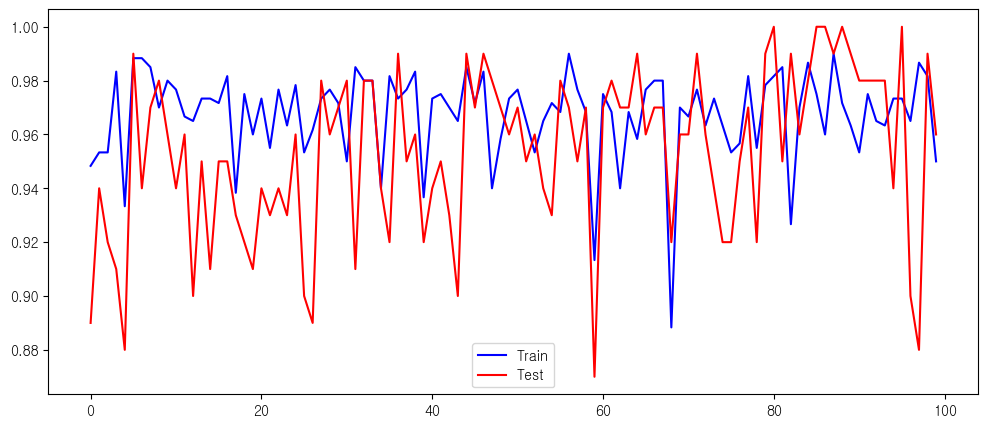

In [60]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 5))
plt.plot(train_score_list1, 'b-', label = 'Train')
plt.plot(test_score_list1, 'r-', label = 'Test')
plt.legend()
plt.show()

In [61]:
y_pre_5 = sgd_clf.predict(X_test)
print(f'분류 정확도 => {accuracy_score(y_pre_5, y_test_5)}\n')
print(f'분류 정밀도 => {precision_score(y_pre_5, y_test_5)}\n')
print(f'분류 재현율 => {recall_score(y_pre_5, y_test_5)}\n')
print(f'분류 f1점수 => {f1_score(y_pre_5, y_test_5)}\n')

분류 정확도 => 0.958

분류 정밀도 => 0.5683856502242153

분류 재현율 => 0.9354243542435424

분류 f1점수 => 0.7071129707112971



In [62]:
# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [63]:
# precision, recalls, thresholds = precision_recall_curve(y_train_5, )

In [64]:
img = cv2.imread('../DATA/img_five.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.invert(img_gray)
sgd_clf.predict(np.array(img_gray).reshape(1, -1))

array([False])

## LogisticRegression <hr>

#### fit 사용

In [94]:
y_train_5 = np.where(y_train_5 == True, 1, 0)

In [95]:
np.unique(y_train_5)

array([0, 1])

In [96]:
# 모델 인스턴스 생성 및 학습
logi_clf = LogisticRegression(max_iter = 1000, solver = 'liblinear')
logi_clf.fit(X_train, y_train_5)

LogisticRegression(max_iter=1000, solver='liblinear')

In [97]:
logi_clf.predict([some_digit])

array([1])

In [98]:
print(f'훈련 스코어 => {logi_clf.score(X_train, y_train_5)}\n\n 테스트 스코어 => {logi_clf.score(X_test, y_test_5)}')

훈련 스코어 => 0.9783333333333334

 테스트 스코어 => 0.9774


In [99]:
y_pre_5 = logi_clf.predict(X_test)

In [100]:
print(f'분류 정확도 => {accuracy_score(y_pre_5, y_test_5)}\n')
print(f'분류 정밀도 => {precision_score(y_pre_5, y_test_5)}\n')
print(f'분류 재현율 => {recall_score(y_pre_5, y_test_5)}\n')
print(f'분류 f1점수 => {f1_score(y_pre_5, y_test_5)}\n')

분류 정확도 => 0.9774

분류 정밀도 => 0.8374439461883408

분류 재현율 => 0.9021739130434783

분류 f1점수 => 0.8686046511627907



In [101]:
img = cv2.imread('../DATA/img_five.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.invert(img_gray)
logi_clf.predict(np.array(img_gray).reshape(1, -1))

array([0])

#### partial_fit 사용

In [90]:
logi_clf = LogisticRegression(max_iter = 1000, solver = 'liblinear', warm_start = True)
train_score_list2, test_score_list2 = [], []
for n in range(1, 101):
    logi_clf.fit(X_train[600*(n-1) : 600*n], y_train_5[600*(n-1) : 600*n])
    train_score2 = logi_clf.score(X_train[600*(n-1) : 600*n], y_train_5[600*(n-1) : 600*n])
    test_score2 = logi_clf.score(X_test[100*(n-1) : 100*n], y_test_5[100*(n-1) : 100*n])
    print(f'[기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}\n')
    train_score_list2.append(train_score2)
    test_score_list2.append(test_score2)

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.96

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.92

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.96

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.96

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.91

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.97

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.87

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.97

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.96

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.96

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.88

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.92

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.92

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.94

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.97

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.85

[기본 SGD] 학습 점수 : 1.0, 테스트 점수 : 0.91

[

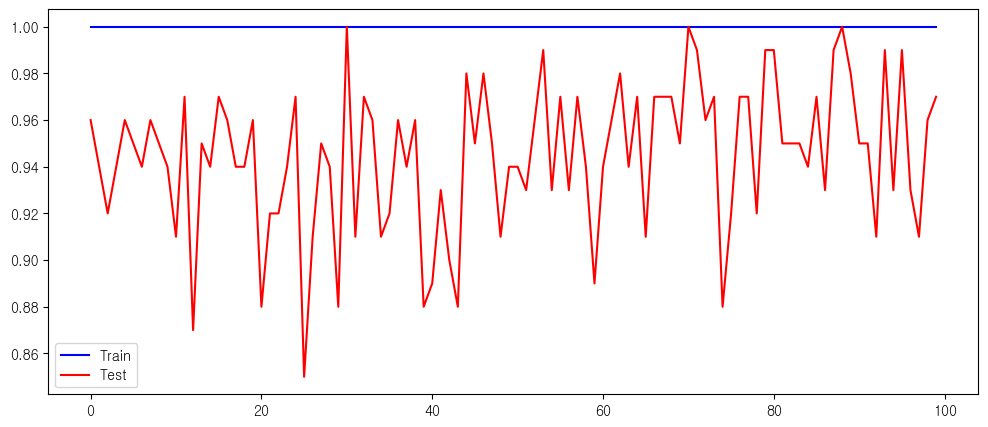

In [91]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 5))
plt.plot(train_score_list2, 'b-', label = 'Train')
plt.plot(test_score_list2, 'r-', label = 'Test')
plt.legend()
plt.show()

In [92]:
y_pre_5 = logi_clf.predict(X_test)
print(f'분류 정확도 => {accuracy_score(y_pre_5, y_test_5)}\n')
print(f'분류 정밀도 => {precision_score(y_pre_5, y_test_5)}\n')
print(f'분류 재현율 => {recall_score(y_pre_5, y_test_5)}\n')
print(f'분류 f1점수 => {f1_score(y_pre_5, y_test_5)}\n')

분류 정확도 => 0.9244

분류 정밀도 => 0.6334080717488789

분류 재현율 => 0.56841046277666

분류 f1점수 => 0.59915164369035



In [93]:
img = cv2.imread('../DATA/img_five.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.invert(img_gray)
logi_clf.predict(np.array(img_gray).reshape(1, -1))

array([1])